# <center><u><font color='red'> Prédiction consommation d'énergie2</font></u></center>

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split
from functions import utils
import math
from sklearn.svm import SVR
from xgboost import XGBRegressor 
from functions.functions import *
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
pd.options.display.float_format = '{:,.4f}'.format


In [78]:
target_col='SiteEnergyUse(kBtu)'

In [79]:
df=pd.read_csv('data/cleaned_and_normalized.csv')


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 54 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NumberofBuildings                                997 non-null    float64
 1   NumberofFloors                                   997 non-null    float64
 2   PropertyGFAParking                               997 non-null    float64
 3   PropertyGFABuilding(s)                           997 non-null    float64
 4   TotalGHGEmissions                                997 non-null    float64
 5   SiteEnergyUse(kBtu)                              997 non-null    float64
 6   ENERGYSTARScore                                  997 non-null    float64
 7   age                                              997 non-null    float64
 8   distance_from_center_ville                       997 non-null    float64
 9   natural_gas_percentage          

In [81]:
df.head()

,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),TotalGHGEmissions,SiteEnergyUse(kBtu),ENERGYSTARScore,age,distance_from_center_ville,natural_gas_percentage,...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,-0.0474,3.9829,0.0000,1.8308,221.5100,"6,298,131.5000",0.0000,0.8934,-1.2909,-0.9068,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,-0.0474,1.8991,0.0000,0.3669,273.0200,"7,606,084.5000",0.0000,1.5005,-1.1087,-0.1279,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,-0.0474,-0.1846,0.0000,0.6826,9.1300,"1,310,236.6250",0.0000,0.7656,-1.2980,-1.1333,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,-0.0474,0.5100,0.0000,1.3300,157.7700,"4,145,920.5000",0.0000,1.5324,0.0383,1.3614,...,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,-0.0474,1.2045,0.0000,1.1558,215.0000,"6,668,568.5000",-1.4874,-1.2792,0.3550,0.8948,...,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [82]:
cols=['best_params','R2','rmse','model','time_elapsed']
df_result=pd.DataFrame(columns=cols)
df_result_with_energy_star_score=pd.DataFrame(columns=cols)

In [83]:
test_size=0.25
random_state=42
cv=5
scoring='r2'
feature_cols=[col for col in df.columns.tolist() if col not in ['TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore']]

 
feature_cols_with_energy_star_score=[col for col in df.columns.tolist() if col not in ['TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore']]

 

In [84]:
X_train,X_test,y_train,y_test=train_test_split(df[feature_cols],df[target_col],test_size=test_size,random_state=random_state)
X_train_with_energy_star_score=X_train[feature_cols_with_energy_star_score]
X_test_with_energy_star_score=X_test[feature_cols_with_energy_star_score]
train_y=y_train.values
test_y=y_test.values


## Partie 1 modèles linéaires

### 1 <u>Modèle linéaire simple</u>

#### 1-1 <u>Régression linéaire sans ENERGYSTARScore </u>

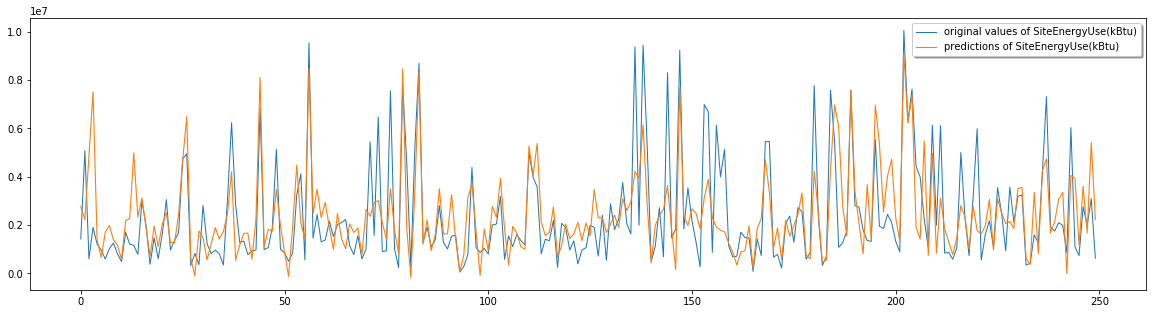

,best_params,R2,rmse,model,time_elapsed
0,None,0.5036,"1,507,792.3566",LinearRegression,0.0024


In [85]:

train_x=X_train.values
test_x=X_test.values
 

result=utils.model_func(df,LinearRegression(),target_col,feature_cols,test_size,random_state,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
df_result

### 2 <u>Régression de ridge</u>

#### 2-1 <u>Régression de ridge sans ENERGYSTARScore </u>

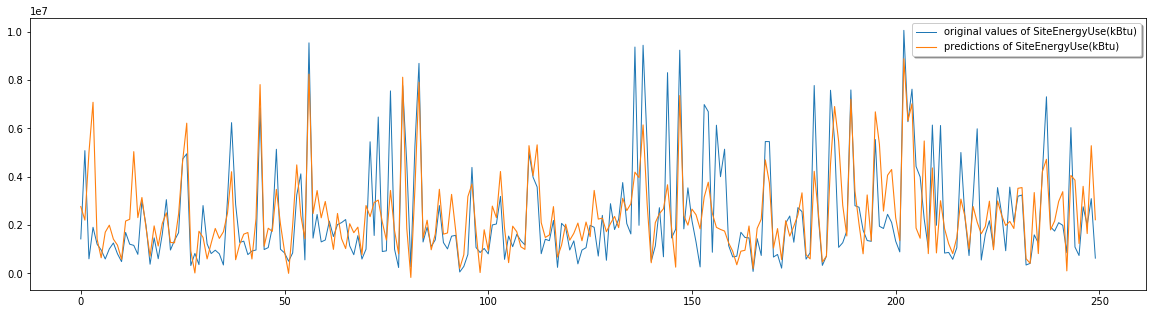

{'best_params': {'alpha': 0.92, 'fit_intercept': True, 'solver': 'saga'}, 'R2': 0.49992528473228354, 'rmse': 1482797.5649129678, 'model': 'Ridge', 'time_elapsed': 1.0193750709295273}


In [86]:

train_x=X_train_with_energy_star_score.values
test_x=X_test.values
 
param_grid = [{
    #'alpha':np.arange(0,1.01,0.01),
      'alpha':[0.92],
    'fit_intercept':[True,False],
  
  'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}]



scoring = 'r2'
 
model = Ridge(random_state=random_state)
#ridge.best_params_,ridge.best_score_,rmse,model.__class__.__name__,elapsed
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
print(result)

### 3 <u>Régression de Lasso</u>

#### 3-1 <u>Régression de Lasso sans ENERGYSTARScore </u>

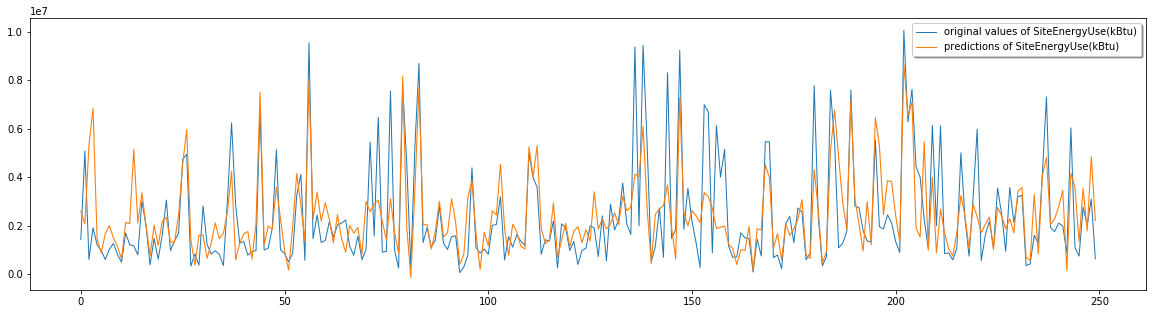

{'best_params': {'alpha': 5994, 'fit_intercept': True}, 'R2': 0.5012060698454293, 'rmse': 1456353.9497890854, 'model': 'Lasso', 'time_elapsed': 0.0668710800819099}


,best_params,R2,rmse,model,time_elapsed
0,None,0.5036,"1,507,792.3566",LinearRegression,0.0024
1,"{'alpha': 0.92, 'fit_intercept': True, 'solver...",0.4999,"1,482,797.5649",Ridge,1.0194
2,"{'alpha': 5994, 'fit_intercept': True}",0.5012,"1,456,353.9498",Lasso,0.0669


In [87]:
train_x=X_train.values
test_x=X_test.values

 
param_grid = [{
    #'alpha':np.arange(3001,10001,1),
      'alpha':[5994],
    'fit_intercept':[True,False],
  
  
}]




 
model = Lasso( random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
print(result)
df_result

### 4 <u>Régression de ElasticNet</u>

#### 4-1 <u>Régression de ElasticNet sans ENERGYSTARScore </u>

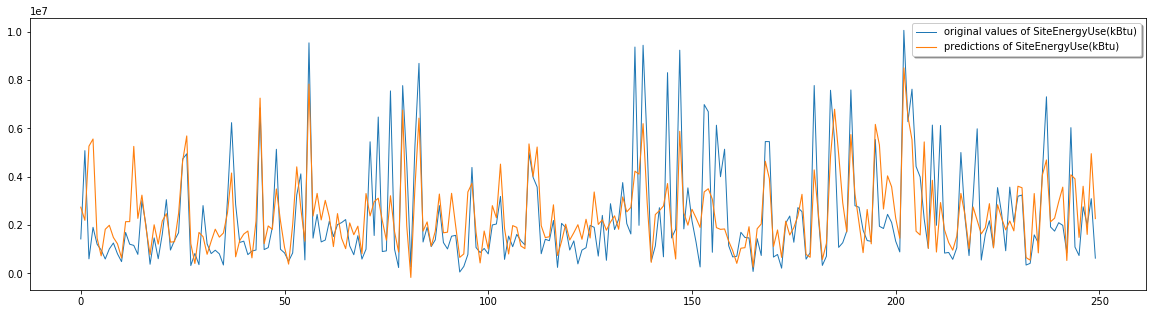

,best_params,R2,rmse,model,time_elapsed
0,None,0.5036,"1,507,792.3566",LinearRegression,0.0024
1,"{'alpha': 0.92, 'fit_intercept': True, 'solver...",0.4999,"1,482,797.5649",Ridge,1.0194
2,"{'alpha': 5994, 'fit_intercept': True}",0.5012,"1,456,353.9498",Lasso,0.0669
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.4858,"1,482,020.7118",ElasticNet,26.6282


In [88]:
train_x=X_train.values
test_x=X_test.values
 #param_grid = [{'alpha' : np.arange(0,0.2,0.001)}]
param_grid = [{"alpha": np.arange(0.01,1.01,0.01),  #coefficient qui multiplie le terme de pénalité
              "l1_ratio": np.arange(0, 0.01, 0.001)}]#L1 ratio si = 1 équivaut à un Lasso si 0 à un Ridge


 
model = ElasticNet( random_state=random_state,normalize=False)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result=df_result.append(result,ignore_index = True)
df_result

## Partie 2 modèles non linéaires

### 1 <u>Random Forest</u>

#### 1-1 <u>Random Forest sans ENERGYSTARScore </u>

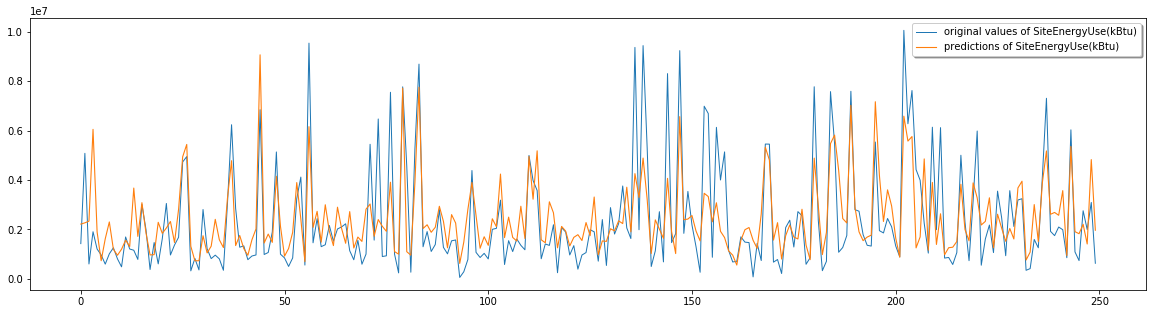

{'best_params': {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, 'R2': 0.478675184155982, 'rmse': 1378500.5980961279, 'model': 'RandomForestRegressor', 'time_elapsed': 1.3304553260095417}


,best_params,R2,rmse,model,time_elapsed
0,None,0.5036,"1,507,792.3566",LinearRegression,0.0024
1,"{'alpha': 0.92, 'fit_intercept': True, 'solver...",0.4999,"1,482,797.5649",Ridge,1.0194
2,"{'alpha': 5994, 'fit_intercept': True}",0.5012,"1,456,353.9498",Lasso,0.0669
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.4858,"1,482,020.7118",ElasticNet,26.6282
4,"{'bootstrap': False, 'max_depth': 40, 'max_fea...",0.4787,"1,378,500.5981",RandomForestRegressor,1.3305


In [89]:

train_x=X_train.values
test_x=X_test.values
 

'''
param_grid = {
'n_estimators':[5,20,50,100], # nombre d'arbres
'max_features':['auto', 'sqrt'], # nombre de variables tenu en compte pour la création de chaque arbre
'max_depth':np.arange(10,130,10), # nombre maximum de niveaux dans chaque arbre de décision 
'min_samples_split':[2, 6, 10], # nombre minimal d'observation avant séparation du noeud
'min_samples_leaf':[1, 3, 4], #nombre minimal d'observation pour créer une feuille
'bootstrap':[True, False] # méthode d'échantillonnage
}   
'''
 
## best params


param_grid={'bootstrap': [False],
  'max_depth': [40],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [2],
  'n_estimators': [100]}

model = RandomForestRegressor(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
print(result)
df_result


In [90]:
#df_result['best_params']
#df_result.iloc[34][['best_params']]
result                        

{'best_params': {'bootstrap': False,
  'max_depth': 40,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 'R2': 0.478675184155982,
 'rmse': 1378500.5980961279,
 'model': 'RandomForestRegressor',
 'time_elapsed': 1.3304553260095417}

  ### 2 <u>XGBoost</u>

#### 2-1 <u>XGBoost sans ENERGYSTARScore </u>

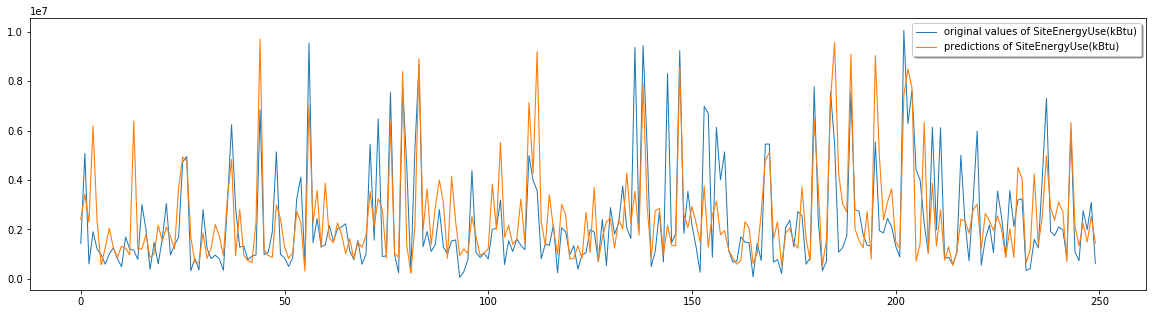

,best_params,R2,rmse,model,time_elapsed
0,None,0.5036,"1,507,792.3566",LinearRegression,0.0024
1,"{'alpha': 0.92, 'fit_intercept': True, 'solver...",0.4999,"1,482,797.5649",Ridge,1.0194
2,"{'alpha': 5994, 'fit_intercept': True}",0.5012,"1,456,353.9498",Lasso,0.0669
3,"{'alpha': 0.01, 'l1_ratio': 0.009000000000000001}",0.4858,"1,482,020.7118",ElasticNet,26.6282
4,"{'bootstrap': False, 'max_depth': 40, 'max_fea...",0.4787,"1,378,500.5981",RandomForestRegressor,1.3305
5,"{'learning_rate': 0.1, 'max_depth': 35, 'n_est...",0.3050,"1,568,034.3321",XGBRegressor,2.7860


In [91]:
 
train_x=X_train.values
test_x=X_test.values
 

'''
param_grid = {
    'learning_rate':np.arange(0.1,1,0.1),
    'n_estimators':  np.arange(50, 110, 10),  #nombre d'arbres de décision 50
              'max_depth': np.arange(20, 50, 5)} #nombre maximum de niveaux dans chaque arbre de décision 20
# define the model/ estimator
'''

param_grid={'learning_rate': [0.1], 'max_depth': [35], 'n_estimators': [50]}

model = XGBRegressor(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result
 

In [92]:
result

{'best_params': {'learning_rate': 0.1, 'max_depth': 35, 'n_estimators': 50},
 'R2': 0.30499481486384805,
 'rmse': 1568034.3321092543,
 'model': 'XGBRegressor',
 'time_elapsed': 2.7859542050864547}

In [ ]:
from sklearn.preprocessing import StandardScaler
Labels=df_result['model'].unique().tolist()
 
 
numeric_cols=['R2','rmse','time_elapsed']
fig, ax = plt.subplots(figsize=(40,15))
data_plot=df_result.copy()
data_plot['R2']=data_plot['R2']+2000000
data_plot['rmse']=data_plot['rmse']-20000
 
utils.bar_plot(ax,data_plot[['time_elapsed','rmse','R2']], total_width=1.5, single_width=0.9)
plt.xticks(range(len(Labels)), Labels, fontsize=20, rotation=45)

ttl = plt.title("modèles de prédictions consommation énergie sans energystartscore", fontsize=26)
ttl.set_position([.5, 1.03])
plt.show()

In [ ]:
df_result.sort_values(by='R2',ascending=False)